In [10]:
#Mount the googledrive to access files
from google.colab import drive
drive.mount('/content/drive')
#Path of the file
#'/content/drive/MyDrive/......csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#import the pandas as pd
import pandas as pd
#importing the dataset from Google Drive location
dataset_path = '/content/drive/MyDrive/Assignment 2/forestfires.csv'
df = pd.read_csv(dataset_path)
print(df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [12]:
# Code to find the missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [13]:
# Code to Identify the duplicates in the Dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 4


In [14]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (513, 13)


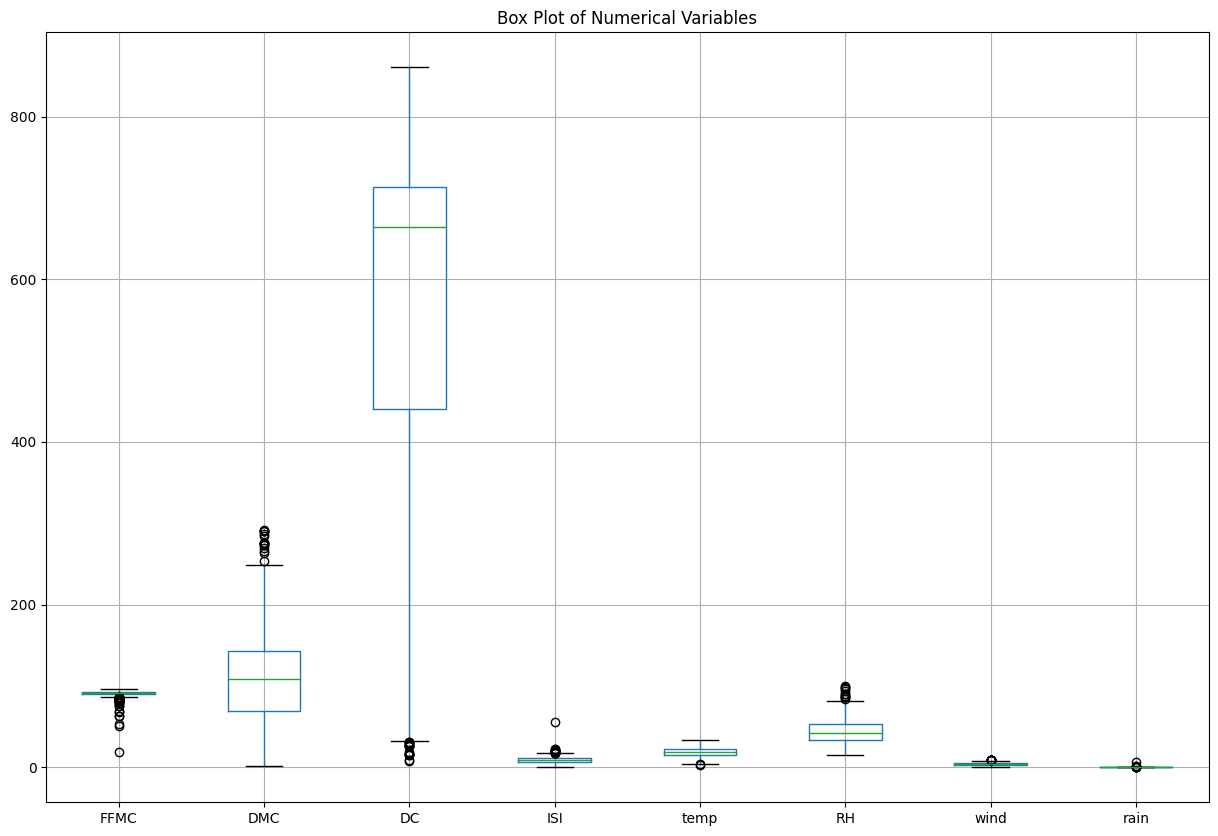

In [15]:
# List of relevant numerical columns
numerical_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Detect outliers using box plots
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Variables')
plt.show()

In [16]:
# Define a function to remove outliers
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from key columns
df_cleaned = remove_outliers(df, numerical_columns)
print(f"Data shape before removing outliers: {df.shape}")
print(f"Data shape after removing outliers: {df_cleaned.shape}")


Data shape before removing outliers: (513, 13)
Data shape after removing outliers: (403, 13)


In [21]:
# Sepatating the numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns)

     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[513 rows x 11 columns]


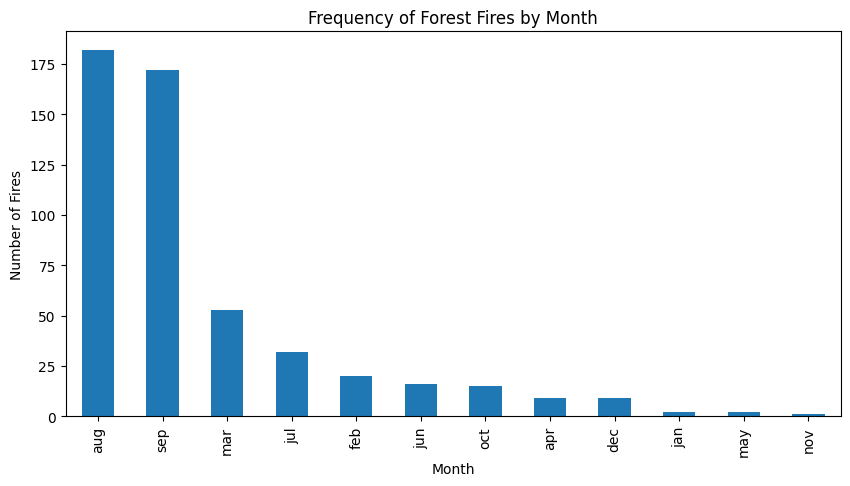

In [ ]:
# Counting the number of forest fires for each month
month_counts = df['month'].value_counts()

# Plotting the frequency of forest fires by month
month_counts.plot(kind='bar', figsize=(10, 5))

# Adding title and labels to the plot
plt.title('Frequency of Forest Fires by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')

# Displaying the plot
plt.show()


             X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.542705 -0.020499 -0.048861 -0.088801  0.006033 -0.051070   
Y     0.542705  1.000000 -0.045979  0.008210 -0.098496 -0.023142 -0.023871   
FFMC -0.020499 -0.045979  1.000000  0.383641  0.332936  0.532083  0.431609   
DMC  -0.048861  0.008210  0.383641  1.000000  0.681741  0.304585  0.469590   
DC   -0.088801 -0.098496  0.332936  0.681741  1.000000  0.228168  0.497584   
ISI   0.006033 -0.023142  0.532083  0.304585  0.228168  1.000000  0.394217   
temp -0.051070 -0.023871  0.431609  0.469590  0.497584  0.394217  1.000000   
RH    0.083757  0.062587 -0.300827  0.071711 -0.044067 -0.133363 -0.528670   
wind  0.020869 -0.019537 -0.029208 -0.105111 -0.203010  0.106825 -0.227618   
rain  0.065176  0.033313  0.056806  0.074780  0.035690  0.067664  0.069526   
area  0.062930  0.045168  0.040232  0.073783  0.050313  0.008411  0.098222   

            RH      wind      rain      area  
X     0.083757  

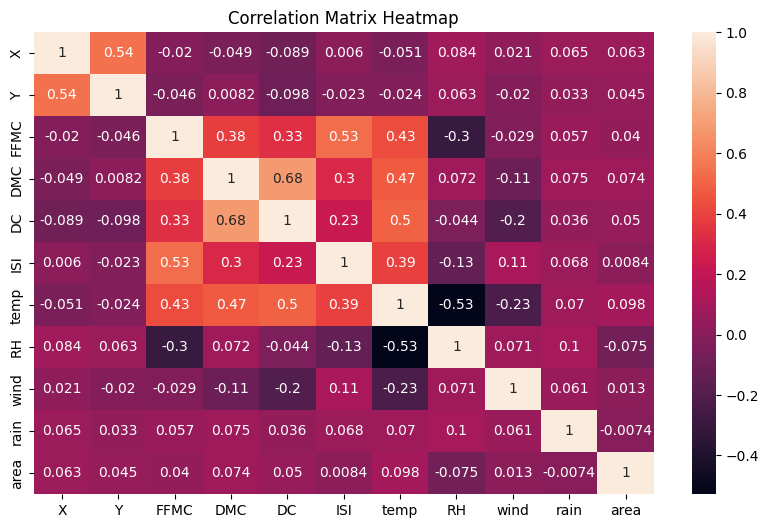

In [22]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

correlation_mattrix = numeric_columns.corr()
print(correlation_mattrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_mattrix,annot=True)#, xticklabels=numeric_columns.columns, yticklabels=numeric_columns.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

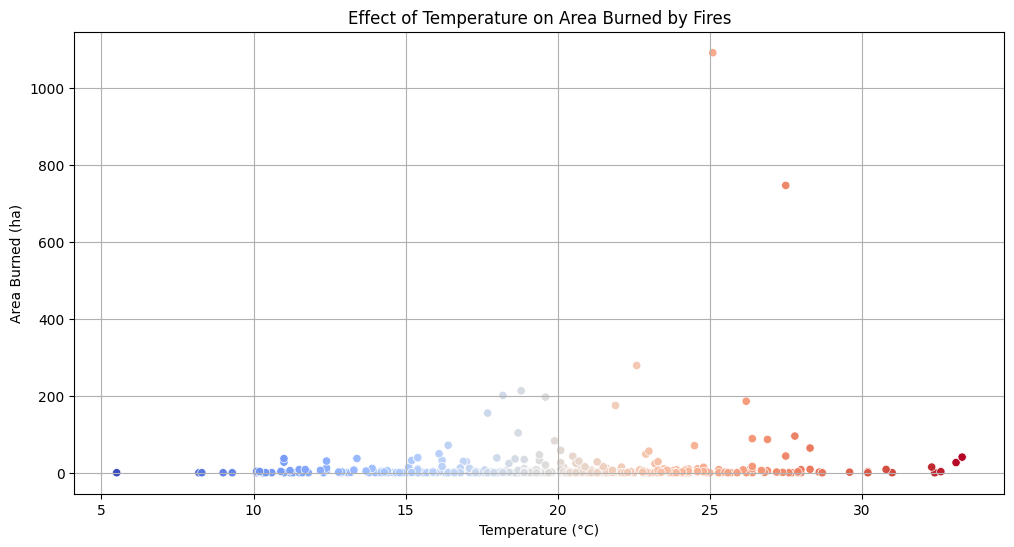

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='area', data=df_cleaned, hue='temp', palette='coolwarm', legend=False)
plt.title('Effect of Temperature on Area Burned by Fires')
plt.xlabel('Temperature (°C)')
plt.ylabel('Area Burned (ha)')
plt.grid(True)
plt.show()
